In [1]:
import pandas as pd
import os
import shutil
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = "ASVspoof5.dev.track_1.tsv"
df = pd.read_csv(file_path, sep="\t", header=None)
print(df.head())
print(f"Total columns: {df.shape[1]}")

                                             0
0  D_0062 D_0000000001 F - - - AC1 A11 spoof -
1  D_0755 D_0000000022 F - - - AC3 A16 spoof -
2  D_0106 D_0000000043 M - - - AC2 A15 spoof -
3  D_5368 D_0000000064 M - - - AC2 A12 spoof -
4  D_3166 D_0000000085 M - - - AC2 A15 spoof -
Total columns: 1


In [3]:
items=df.iloc[:, -1].unique()

In [4]:
items[2]

'D_0106 D_0000000043 M - - - AC2 A15 spoof -'

In [5]:
len(items)

140950

In [6]:
spoof_count = 0
bonafide_count = 0
for item in items:
    words = item.split()
    if "spoof" in words:
        spoof_count += 1
    if "bonafide" in words:
        bonafide_count += 1
print("Number of spoof items:", spoof_count)
print("Number of bonafide items:", bonafide_count)

Number of spoof items: 109616
Number of bonafide items: 31334


In [7]:
spoof_files = []
bonafide_files = []
for item in items:
    words = item.split()
    filename = words[1] + ".flac"
    if "spoof" in words:
        if len(spoof_files)>4999:
            continue
        spoof_files.append(filename)
    if "bonafide" in words:
        if len(bonafide_files)>4999:
            break
        bonafide_files.append(filename)

In [8]:
len(spoof_files)

5000

In [9]:
len(bonafide_files)

5000

In [10]:
bonafide_files[0:10]

['D_0000000190.flac',
 'D_0000000253.flac',
 'D_0000000631.flac',
 'D_0000000715.flac',
 'D_0000000736.flac',
 'D_0000000862.flac',
 'D_0000000904.flac',
 'D_0000001093.flac',
 'D_0000001114.flac',
 'D_0000001135.flac']

In [11]:
spoof_files[0:10]

['D_0000000001.flac',
 'D_0000000022.flac',
 'D_0000000043.flac',
 'D_0000000064.flac',
 'D_0000000085.flac',
 'D_0000000106.flac',
 'D_0000000127.flac',
 'D_0000000148.flac',
 'D_0000000169.flac',
 'D_0000000211.flac']

In [50]:
source_dir = r"D:\Research Papers\Audio Deepfake\flac_D"
spoof_dir = os.path.join(source_dir, "spoof")
bonafide_dir = os.path.join(source_dir, "bonafide")
os.makedirs(spoof_dir, exist_ok=True)
os.makedirs(bonafide_dir, exist_ok=True)

for filename in spoof_files:
    src_path = os.path.join(source_dir, filename)
    dest_path = os.path.join(spoof_dir, filename)
    if os.path.exists(src_path):
        shutil.move(src_path, dest_path)
        
for filename in bonafide_files:
    src_path = os.path.join(source_dir, filename)
    dest_path = os.path.join(bonafide_dir, filename)
    if os.path.exists(src_path):
        shutil.move(src_path, dest_path)

print("Files successfully moved to respective folders.")

Files successfully moved to respective folders.


In [12]:
bonafide_audio_path = r"D:\Research Papers\Audio Deepfake\flac_D\bonafide"
spoof_audio_path = r"D:\Research Papers\Audio Deepfake\flac_D\spoof"

bonafide_img_path = r"D:\Research Papers\Audio Deepfake\flac_D\bonafide_img"
spoof_img_path = r"D:\Research Papers\Audio Deepfake\flac_D\spoof_img"

os.makedirs(bonafide_img_path, exist_ok=True)
os.makedirs(spoof_img_path, exist_ok=True)

def generate_spectrogram(audio_file, save_path):
    y, sr = librosa.load(audio_file, sr=None)
    plt.figure(figsize=(5, 5))
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    S_dB = librosa.power_to_db(S, ref=np.max)

    librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
    plt.axis('off')
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
    plt.close()

In [53]:
for file in os.listdir(bonafide_audio_path):
    if file.endswith(".flac"):
        audio_file = os.path.join(bonafide_audio_path, file)
        image_file = os.path.join(bonafide_img_path, file.replace(".flac", ".png"))
        generate_spectrogram(audio_file, image_file)

for file in os.listdir(spoof_audio_path):
    if file.endswith(".flac"):
        audio_file = os.path.join(spoof_audio_path, file)
        image_file = os.path.join(spoof_img_path, file.replace(".flac", ".png"))
        generate_spectrogram(audio_file, image_file)

print("Spectrogram images saved successfully!")

Spectrogram images saved successfully!


In [13]:
IMAGE_SIZE=387
BATCH_SIZE=100
CHANNELS=3
EPOCHS=20

In [14]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np

In [15]:
dataset=tf.keras.preprocessing.image_dataset_from_directory("flac_D\Image",
                                                            seed=123,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE)

<>:1: SyntaxWarning: invalid escape sequence '\I'
<>:1: SyntaxWarning: invalid escape sequence '\I'
C:\Users\admin\AppData\Local\Temp\ipykernel_7872\2198656405.py:1: SyntaxWarning: invalid escape sequence '\I'
  dataset=tf.keras.preprocessing.image_dataset_from_directory("flac_D\Image",


Found 10000 files belonging to 2 classes.


In [16]:
class_names=dataset.class_names
class_names

['bonafide_img', 'spoof_img']

In [17]:
len(dataset)

100

In [18]:
100*100

10000

In [19]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(100, 256, 256, 3)
[1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0
 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1]


In [20]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[ 25.83789   15.767578  65.65234 ]
  [ 37.        18.        85.      ]
  [ 36.79297   17.        84.18945 ]
  ...
  [  0.         0.         4.      ]
  [  0.         0.         4.      ]
  [  0.         0.         4.      ]]

 [[ 25.83789   15.767578  65.65234 ]
  [ 37.        18.        85.      ]
  [ 36.79297   17.        84.18945 ]
  ...
  [  0.         0.         4.      ]
  [  0.         0.         4.      ]
  [  0.         0.         4.      ]]

 [[ 23.046875  14.767578  59.83789 ]
  [ 29.        17.        71.      ]
  [ 46.585938  16.441406  96.42383 ]
  ...
  [  0.         0.         4.      ]
  [  0.         0.         4.      ]
  [  0.         0.         4.      ]]

 ...

 [[135.12643   38.54274  127.80061 ]
  [131.1543    37.02539  127.2207  ]
  [151.83813   44.692787 127.79326 ]
  ...
  [142.07565   41.44979  128.65372 ]
  [140.99207   41.073982 128.51045 ]
  [129.52177   36.60748  128.09387 ]]

 [[149.23242   43.74414  128.      ]
  [147.        43.       128.      ]


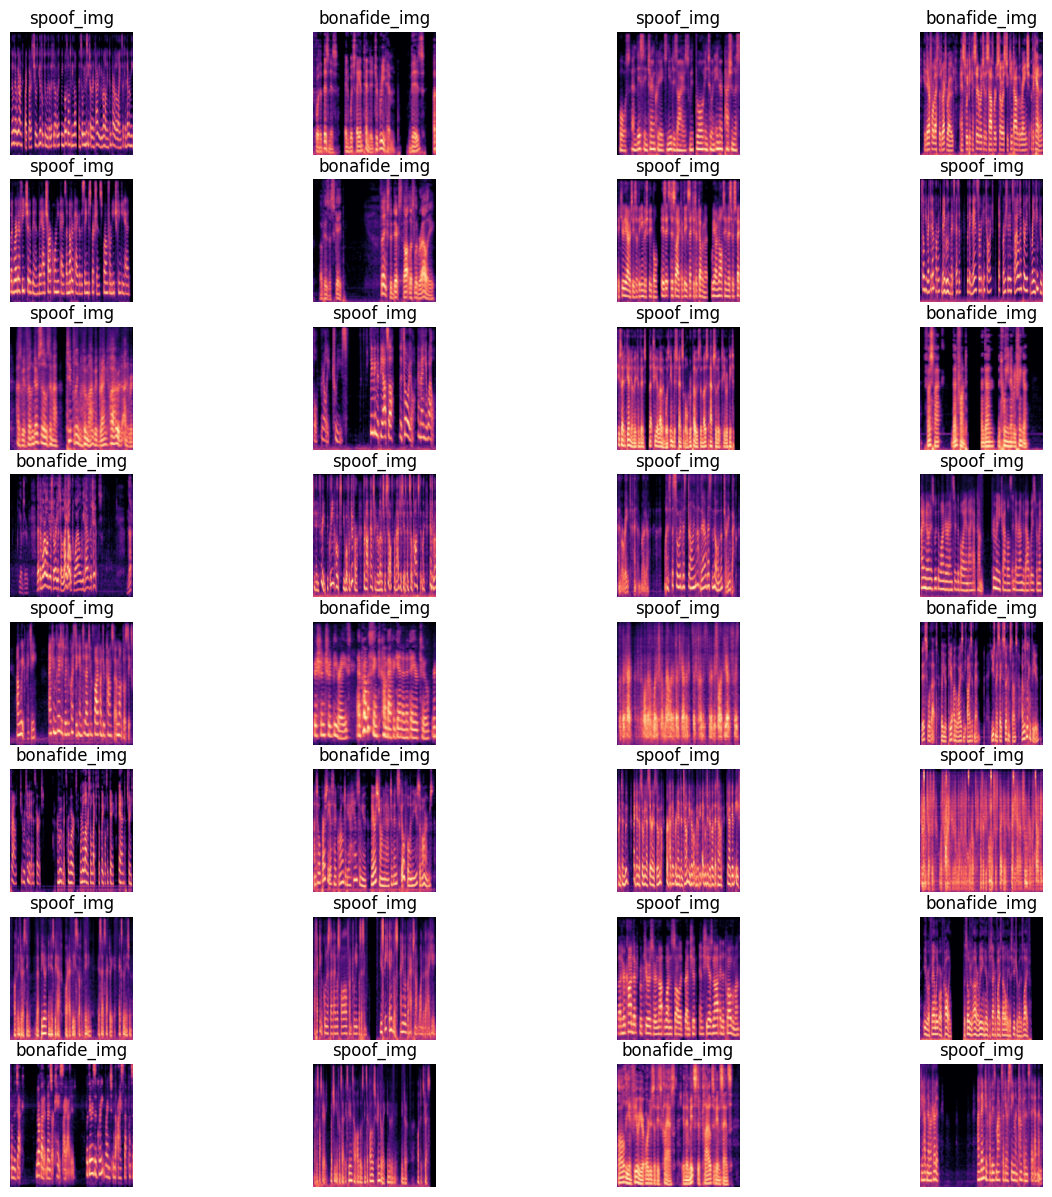

In [21]:
plt.figure(figsize=(15,15))
for image_batch,label_batch in dataset.take(1):
    for i in range(32):
        ax=plt.subplot(8,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [22]:
train_size=0.8
len(dataset)*train_size

80.0

In [23]:
train_ds=dataset.take(80)
len(train_ds)

80

In [24]:
test_ds=dataset.skip(80)
len(test_ds)

20

In [25]:
val_size=0.1
len(dataset)*val_size

10.0

In [26]:
val_ds=test_ds.take(10)
test_ds=test_ds.skip(10)

In [27]:
def get_dataset_partition_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [28]:
train_ds,val_ds,test_ds=get_dataset_partition_tf(dataset)

In [29]:
len(train_ds)+len(test_ds)+len(val_ds)==len(dataset)

True

In [30]:
train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [31]:
resize_and_rescale=tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    tf.keras.layers.Rescaling(1.0/255)
])

In [32]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=2

model=models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])

model.build(input_shape=input_shape)

C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (100, 387, 387, 3)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (100, 385, 385, 32)         │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (100, 192, 192, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (100, 190, 190, 64)         │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (100, 95, 95, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (100, 93, 93, 64)           │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (100, 46, 46, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (100, 44, 44, 64)           │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (100, 22, 22, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (100, 20, 20, 64)           │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (100, 10, 10, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (100, 8, 8, 64)             │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (100, 4, 4, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (100, 1024)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (100, 64)                   │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (100, 2)                    │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 232,834 (909.51 KB)

 Trainable params: 232,834 (909.51 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [35]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 286s 3s/step - accuracy: 0.5295 - loss: 0.6858 - val_accuracy: 0.6790 - val_loss: 0.6154
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 306s 3s/step - accuracy: 0.6924 - loss: 0.5810 - val_accuracy: 0.8890 - val_loss: 0.3219
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 293s 3s/step - accuracy: 0.8604 - loss: 0.3531 - val_accuracy: 0.9020 - val_loss: 0.3082
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 304s 3s/step - accuracy: 0.9041 - loss: 0.2608 - val_accuracy: 0.9380 - val_loss: 0.1862
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 304s 3s/step - accuracy: 0.9266 - loss: 0.1986 - val_accuracy: 0.9370 - val_loss: 0.1700
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 309s 3s/step - accuracy: 0.9415 - loss: 0.1593 - val_accuracy: 0.9430 - val_loss: 0.1427
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 307s 3s/step - accuracy: 0.9517 - loss: 0.1279 - val_accuracy: 0.9330 - val_loss: 0.1598
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 309s 3s/step - accuracy: 0.9640 - loss: 0.1065 - val_accuracy: 0.9660 - v

In [36]:
scores=model.evaluate(test_ds)

10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 886ms/step - accuracy: 1.0000 - loss: 0.0013


In [37]:
scores

[0.0009427316254004836, 1.0]

In [38]:
history

In [39]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 80}

In [40]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [41]:
history.history['accuracy']

[0.581250011920929,
 0.7411249876022339,
 0.871999979019165,
 0.9151250123977661,
 0.9293749928474426,
 0.9402499794960022,
 0.9526249766349792,
 0.9658750295639038,
 0.9678750038146973,
 0.9767500162124634,
 0.9788749814033508,
 0.9807500243186951,
 0.9853749871253967,
 0.9802500009536743,
 0.9917500019073486,
 0.9942499995231628,
 0.9815000295639038,
 0.9916250109672546,
 0.9981250166893005,
 1.0]

In [42]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

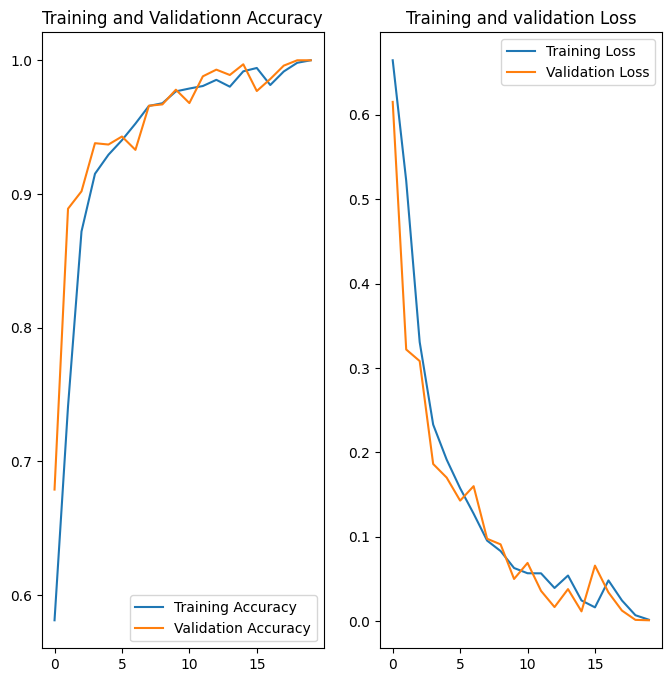

In [43]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validationn Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title("Training and validation Loss")
plt.show()

first image to predict
actual label: spoof_img
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 283ms/step
predicted label: spoof_img


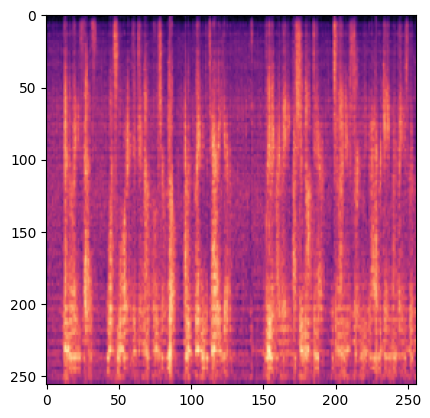

In [44]:
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [45]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)

    predictions=model.predict(img_array)

    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


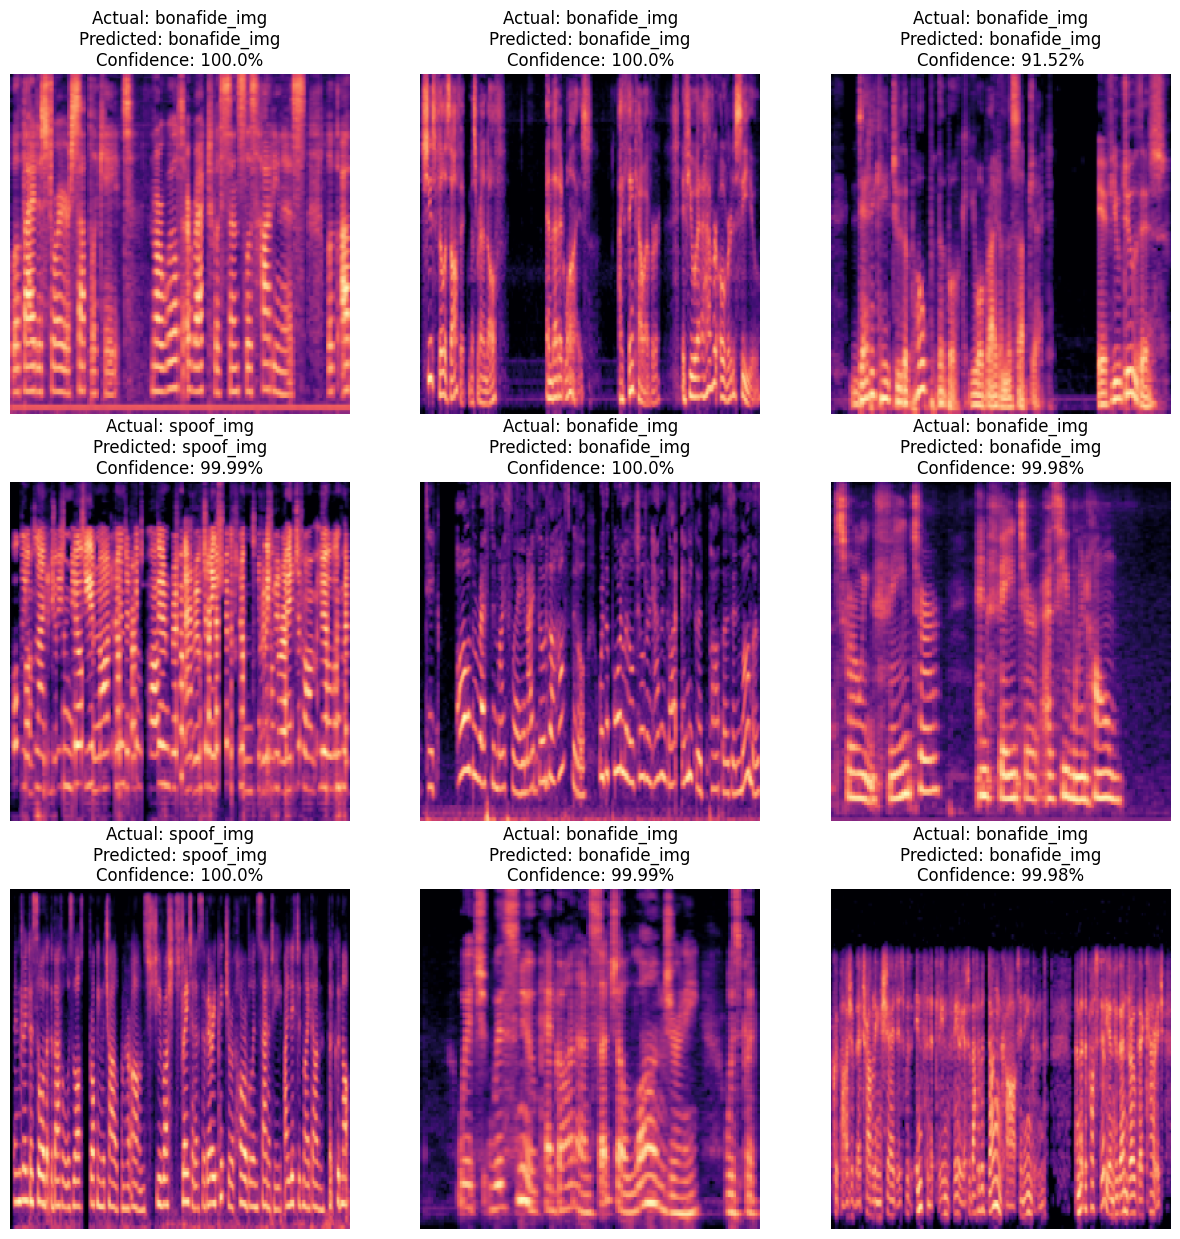

In [46]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))

        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class=class_names[labels[i]]

        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence}%")
        plt.axis('off')